## Analisis de logs con spark


### Seminario de base de datos 2020-1

#### Estudiante:Carlos Alberto Benavidez Vega
#### Estudiante:Juan Camilo Roja Ricaurte

### 1. Importar librerias

In [11]:
!pip install pyspark

In [12]:
!pip install findspark

In [8]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
import findspark
findspark.init('C:\BigData\Spark')

In [3]:
import findspark
findspark.init()
findspark.find()
import pyspark

In [353]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark import Row
import re 
conf = SparkConf().setAppName("SparkLogAnalysis").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf)
spark = SparkSession(sc)


### 2.Cargar el archivo con spark

In [7]:
logs_rdd=sc.textFile('C:\BigData/auth.log') #File
rdd=logs_rdd#File to RDD

### Número de líneas que hay en el archivo

In [8]:
print("Number of line is : ",rdd.count()) 

Number of line is :  102164


### Visualizar algúnos registros

In [9]:
rdd.take(10)

['Mar 16 08:12:04 app-1 login[4659]: pam_unix(login:session): session opened for user user3 by LOGIN(uid=0)',
 'Mar 16 08:12:09 app-1 sudo:     user3 : TTY=tty1 ; PWD=/home/user3 ; USER=root ; COMMAND=/bin/su',
 'Mar 16 08:12:09 app-1 sudo: pam_unix(sudo:session): session opened for user root by user3(uid=0)',
 'Mar 16 08:12:09 app-1 sudo: pam_unix(sudo:session): session closed for user root',
 'Mar 16 08:12:09 app-1 su[4679]: Successful su for root by root',
 'Mar 16 08:12:09 app-1 su[4679]: + tty1 root:root',
 'Mar 16 08:12:09 app-1 su[4679]: pam_unix(su:session): session opened for user root by user3(uid=0)',
 'Mar 16 08:12:13 app-1 groupadd[4691]: new group: name=user4, GID=1001',
 'Mar 16 08:12:13 app-1 useradd[4692]: new user: name=user4, UID=1001, GID=1001, home=/home/user4, shell=/bin/bash',
 'Mar 16 08:12:17 app-1 passwd[4695]: pam_unix(passwd:chauthtok): password changed for user4']

### Cuántos inicios de sesión exitosos?

In [10]:
succesfull_start=rdd.filter(lambda line: "session opened for user" in line)
print("Succesfull start : ",succesfull_start.count())

Succesfull start :  15451


In [11]:
succesfull_start.take(10)

['Mar 16 08:12:04 app-1 login[4659]: pam_unix(login:session): session opened for user user3 by LOGIN(uid=0)',
 'Mar 16 08:12:09 app-1 sudo: pam_unix(sudo:session): session opened for user root by user3(uid=0)',
 'Mar 16 08:12:09 app-1 su[4679]: pam_unix(su:session): session opened for user root by user3(uid=0)',
 'Mar 16 08:17:01 app-1 CRON[4716]: pam_unix(cron:session): session opened for user root by (uid=0)',
 'Mar 16 08:26:06 app-1 sshd[4896]: pam_unix(sshd:session): session opened for user user3 by (uid=0)',
 'Mar 16 08:27:37 app-1 sudo: pam_unix(sudo:session): session opened for user root by user3(uid=0)',
 'Mar 16 08:27:37 app-1 su[4913]: pam_unix(su:session): session opened for user root by user3(uid=0)',
 'Mar 16 09:17:01 app-1 CRON[5085]: pam_unix(cron:session): session opened for user root by (uid=0)',
 'Mar 16 10:14:02 app-1 sshd[5144]: pam_unix(sshd:session): session opened for user user3 by (uid=0)',
 'Mar 16 10:14:10 app-1 sudo: pam_unix(sudo:session): session opened for

### Qué usuarios acceden correctamente?

In [12]:
user_ok=succesfull_start.map(lambda x: (x.split(" ")[10], x))

In [14]:
user_list = user_ok.reduceByKey(lambda x,y: (x))
user_list.take(5)

[('root',
  'Mar 16 08:12:09 app-1 sudo: pam_unix(sudo:session): session opened for user root by user3(uid=0)'),
 ('user1',
  'Mar 18 10:00:10 app-1 sshd[4766]: pam_unix(sshd:session): session opened for user user1 by (uid=0)'),
 ('user2',
  'Mar 18 11:39:50 app-1 sshd[10179]: pam_unix(sshd:session): session opened for user user2 by (uid=0)'),
 ('www-data',
  'Mar 18 15:12:12 app-1 su[13398]: pam_unix(su:session): session opened for user www-data by user3(uid=0)'),
 ('nobody',
  'Mar 24 06:25:04 app-1 su[8032]: pam_unix(su:session): session opened for user nobody by (uid=0)')]

In [15]:
print ("Users Access succesfull:",user_list.count())

Users Access succesfull: 9


In [16]:
user_list.collect()

[('root',
  'Mar 16 08:12:09 app-1 sudo: pam_unix(sudo:session): session opened for user root by user3(uid=0)'),
 ('user1',
  'Mar 18 10:00:10 app-1 sshd[4766]: pam_unix(sshd:session): session opened for user user1 by (uid=0)'),
 ('user2',
  'Mar 18 11:39:50 app-1 sshd[10179]: pam_unix(sshd:session): session opened for user user2 by (uid=0)'),
 ('www-data',
  'Mar 18 15:12:12 app-1 su[13398]: pam_unix(su:session): session opened for user www-data by user3(uid=0)'),
 ('nobody',
  'Mar 24 06:25:04 app-1 su[8032]: pam_unix(su:session): session opened for user nobody by (uid=0)'),
 ('dhg',
  'Apr 19 22:46:10 app-1 sshd[2072]: pam_unix(sshd:session): session opened for user dhg by (uid=0)'),
 ('fido',
  'Apr 25 12:21:39 app-1 sshd[10828]: pam_unix(sshd:session): session opened for user fido by (uid=0)'),
 ('user3',
  'Mar 16 08:12:04 app-1 login[4659]: pam_unix(login:session): session opened for user user3 by LOGIN(uid=0)'),
 ('user',
  'Apr  1 00:01:01 app-1 CRON[2269]: pam_unix(cron:sessi

### Conexiones fallidas como root?

In [17]:
failed_connection=rdd.filter(lambda line: "Failed password for root" in line)
print("Failed connection root : ",failed_connection.count())

Failed connection root :  5479


### Login fallidos por ususario?

In [18]:
failed_login=rdd.filter(lambda line: "authentication failure" in line)
failed_login.count()


20353

In [246]:
failed_login.take(5)

['Mar 18 09:41:54 app-1 login[4673]: pam_unix(login:auth): authentication failure; logname=LOGIN uid=0 euid=0 tty=tty1 ruser= rhost= ',
 'Mar 18 11:20:17 app-1 su[9504]: pam_unix(su:auth): authentication failure; logname=user1 uid=1001 euid=0 tty=pts/0 ruser=user1 rhost=  user=root',
 'Mar 18 11:20:24 app-1 su[9506]: pam_unix(su:auth): authentication failure; logname=user1 uid=1001 euid=0 tty=pts/0 ruser=user1 rhost=  user=root',
 'Mar 18 11:38:04 app-1 sshd[10156]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=adsl-71-132-129-212.dsl.pltn13.pacbell.net  user=user2',
 'Mar 18 11:38:43 app-1 sshd[10156]: PAM 2 more authentication failures; logname= uid=0 euid=0 tty=ssh ruser= rhost=adsl-71-132-129-212.dsl.pltn13.pacbell.net  user=user2']

In [247]:
failed_login.take(10)
piru=failed_login.map(lambda x: x.split(";")[1])
piru.collect()

[' logname=LOGIN uid=0 euid=0 tty=tty1 ruser= rhost= ',
 ' logname=user1 uid=1001 euid=0 tty=pts/0 ruser=user1 rhost=  user=root',
 ' logname=user1 uid=1001 euid=0 tty=pts/0 ruser=user1 rhost=  user=root',
 ' logname= uid=0 euid=0 tty=ssh ruser= rhost=adsl-71-132-129-212.dsl.pltn13.pacbell.net  user=user2',
 ' logname= uid=0 euid=0 tty=ssh ruser= rhost=adsl-71-132-129-212.dsl.pltn13.pacbell.net  user=user2',
 ' logname= uid=0 euid=0 tty=ssh ruser= rhost=adsl-71-132-129-212.dsl.pltn13.pacbell.net  user=user2',
 ' logname=user3 uid=1000 euid=0 tty=pts/1 ruser=user3 rhost=  user=root',
 ' logname=user1 uid=0 euid=0 tty=/dev/pts/3 ruser= rhost=  user=user1',
 ' logname=user1 uid=0 euid=0 tty=/dev/pts/1 ruser= rhost=  user=user1',
 ' logname=user1 uid=0 euid=0 tty=/dev/pts/0 ruser= rhost=  user=user1',
 ' logname=user1 uid=0 euid=0 tty=/dev/pts/0 ruser= rhost=  user=user1',
 ' logname=user1 uid=0 euid=0 tty=/dev/pts/0 ruser= rhost=  user=user1',
 ' logname=user1 uid=0 euid=0 tty=/dev/pts/0 

In [325]:
dale=piru.map(lambda x: x.split(" "))

In [351]:
dale.take(3)

[['', 'logname=LOGIN', 'uid=0', 'euid=0', 'tty=tty1', 'ruser=', 'rhost=', ''],
 ['',
  'logname=user1',
  'uid=1001',
  'euid=0',
  'tty=pts/0',
  'ruser=user1',
  'rhost=',
  '',
  'user=root'],
 ['',
  'logname=user1',
  'uid=1001',
  'euid=0',
  'tty=pts/0',
  'ruser=user1',
  'rhost=',
  '',
  'user=root']]

In [326]:
par=dale.filter(lambda x: len(x)==9)
che=par.collect()

In [327]:
lichito=par.map(lambda x: x[8],1)
lichito.count()

5873

In [328]:
lichito.take(5)

['user=root', 'user=root', 'user=user2', 'user=user2', 'user=user2']

In [342]:
final=lichito.map(lambda x: x.split("=")[1])
final.take(3)
final.count()

5873

In [343]:
final.take(3)

['root', 'root', 'user2']

In [344]:
timo=(final.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).collect())
print(timo)

[('root', 5479), ('user2', 3), ('user1', 21), ('games', 35), ('proxy', 12), ('news', 22), ('daemon', 11), ('gnats', 8), ('nobody', 25), ('sync', 12), ('uucp', 11), ('www-data', 16), ('dhg', 1), ('syslog', 1), ('libuuid', 1), ('ntp', 4), ('user3', 1), ('mysql', 44), ('backup', 29), ('mail', 27), ('bin', 11), ('irc', 15), ('list', 11), ('lp', 23), ('man', 14), ('sshd', 23), ('sys', 9), ('dhcp', 2), ('klog', 1), ('Debian-exim', 1)]


In [396]:
timo2=(final.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y))
print(timo2)
maping= timo2.map(lambda p : Row(user=p[0], login_count=p[1]))
dfmaping = spark.createDataFrame(maping)
dfmaping.createOrReplaceTempView("maping")
tabla = spark.sql("SELECT user , login_count FROM maping order by login_count desc")
tabla.show()

PythonRDD[709] at RDD at PythonRDD.scala:53
+--------+-----------+
|    user|login_count|
+--------+-----------+
|    root|       5479|
|   mysql|         44|
|   games|         35|
|  backup|         29|
|    mail|         27|
|  nobody|         25|
|    sshd|         23|
|      lp|         23|
|    news|         22|
|   user1|         21|
|www-data|         16|
|     irc|         15|
|     man|         14|
|    sync|         12|
|   proxy|         12|
|  daemon|         11|
|    uucp|         11|
|     bin|         11|
|    list|         11|
|     sys|          9|
+--------+-----------+
only showing top 20 rows



In [415]:
import collections
import matplotlib.pyplot as plt

l = timo
x=[]
y=[]
for j in l:
    
    #plt.bar(j[0],j[1])
    x.append(j[0])
    y.append(j[1])
    #plt.hist(j[1], orientation='horizontal')
  


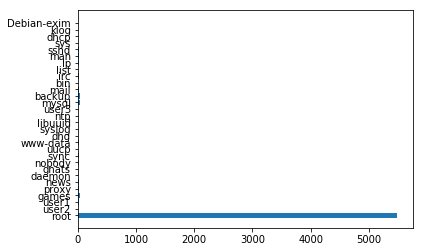

In [416]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make fake dataset
height = y
bars = x
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.hist(data, bins=range(-100, 200, hist_bin_width), 
               weights=factor*np.ones_like(data))
 
# Show graphic
plt.show()


### Cuántos intentos de inicio de sesión son usuarios no válidos?

In [25]:
user_attempt=rdd.filter(lambda line: "invalid user " in line)
user_attempt.count()

14482

In [141]:
user_attempt.take(5)

['Apr 19 04:36:51 app-1 sshd[6990]: Failed password for invalid user tomcat from 203.81.226.86 port 59207 ssh2',
 'Apr 19 05:19:10 app-1 sshd[7169]: Failed password for invalid user admin from 58.17.30.49 port 41483 ssh2',
 'Apr 19 05:22:12 app-1 sshd[7259]: Failed password for invalid user tina from 58.17.30.49 port 55606 ssh2',
 'Apr 19 05:22:16 app-1 sshd[7261]: Failed password for invalid user tom from 58.17.30.49 port 55864 ssh2',
 'Apr 19 05:22:21 app-1 sshd[7263]: Failed password for invalid user tom from 58.17.30.49 port 56103 ssh2']

### Nuevos usuarios creados

In [131]:
new_users=rdd.filter(lambda line: "new user" in line)
new_users.count()

11

In [135]:
new_users.take(5)

['Mar 16 08:12:13 app-1 useradd[4692]: new user: name=user4, UID=1001, GID=1001, home=/home/user4, shell=/bin/bash',
 'Mar 16 08:12:38 app-1 useradd[4703]: new user: name=user1, UID=1001, GID=1001, home=/home/user1, shell=/bin/bash',
 'Mar 16 08:12:55 app-1 useradd[4711]: new user: name=user2, UID=1002, GID=1002, home=/home/user2, shell=/bin/bash',
 'Mar 16 08:25:22 app-1 useradd[4845]: new user: name=sshd, UID=104, GID=65534, home=/var/run/sshd, shell=/usr/sbin/nologin',
 'Mar 18 10:15:42 app-1 useradd[5393]: new user: name=Debian-exim, UID=105, GID=114, home=/var/spool/exim4, shell=/bin/false']

In [138]:
list_new_users=new_users.map(lambda x: x.split(" ")[7]).map(lambda x:x.split("=")[1])
list_new_users.take(5)

['user4,', 'user1,', 'user2,', 'sshd,', 'Debian-exim,']

In [140]:
list_new_users.collect()

['user4,',
 'user1,',
 'user2,',
 'sshd,',
 'Debian-exim,',
 'mysql,',
 'packet,',
 'dhg,',
 'messagebus,',
 'fido,',
 'wind3str0y,']

### Qué direcciones IP tienen el número de conexiones más alto para los logins exitosos?

In [109]:
ip_number=rdd.filter(lambda line: "Accepted password" in line)
ip_number.take(5)


['Mar 16 08:26:06 app-1 sshd[4894]: Accepted password for user3 from 192.168.126.1 port 61474 ssh2',
 'Mar 16 10:14:02 app-1 sshd[5142]: Accepted password for user3 from 192.168.126.1 port 62897 ssh2',
 'Mar 16 17:12:24 app-1 sshd[5513]: Accepted password for user3 from 192.168.126.1 port 63555 ssh2',
 'Mar 18 09:42:22 app-1 sshd[4693]: Accepted password for user3 from 10.0.1.2 port 64721 ssh2',
 'Mar 18 10:00:10 app-1 sshd[4764]: Accepted password for user1 from 76.191.195.140 port 35226 ssh2']

In [110]:
ip_number_ok=ip_number.map(lambda x: (x.split(" ")[10]),1)
ip_number_ok.count()

118

In [310]:
ip_number_ok.take(4)

['192.168.126.1', '192.168.126.1', '192.168.126.1', '10.0.1.2']

In [114]:
ranking = (ip_number_ok.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).collect())
print(ranking)

[('192.168.126.1', 3), ('10.0.1.2', 13), ('166.129.196.88', 1), ('65.195.182.120', 2), ('222.66.204.246', 1), ('201.229.176.217', 1), ('190.167.70.87', 1), ('190.166.87.164', 23), ('121.11.66.70', 2), ('151.81.205.100', 1), ('151.81.204.141', 1), ('65.88.2.5', 6), ('94.52.185.9', 2), ('188.131.23.37', 4), ('208.80.69.70', 1), ('76.191.195.140', 19), ('71.132.129.212', 5), ('208.80.69.74', 7), ('from', 5), ('10.0.1.4', 4), ('219.150.161.20', 4), ('208.80.69.69', 2), ('193.1.186.197', 1), ('151.82.3.201', 1), ('222.169.224.197', 1), ('122.226.202.12', 2), ('61.168.227.12', 1), ('188.131.22.69', 1), ('190.167.74.184', 3)]


In [115]:
print ("There are" ,len(ranking)," IPs with Succesful logs")

There are 29  IPs with Succesful logs


In [418]:
raking2=ip_number_ok.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
print(raking2)
maping2= raking2.map(lambda p : Row(ip=p[0], frecuency=p[1]))
dfmaping2 = spark.createDataFrame(maping2)
dfmaping2.createOrReplaceTempView("maping2")
tabla2 = spark.sql("SELECT ip , frecuency FROM maping2 order by frecuency  desc")
tabla2.show()

PythonRDD[738] at RDD at PythonRDD.scala:53
+---------------+---------+
|             ip|frecuency|
+---------------+---------+
| 190.166.87.164|       23|
| 76.191.195.140|       19|
|       10.0.1.2|       13|
|   208.80.69.74|        7|
|      65.88.2.5|        6|
| 71.132.129.212|        5|
|           from|        5|
|       10.0.1.4|        4|
| 219.150.161.20|        4|
|  188.131.23.37|        4|
| 190.167.74.184|        3|
|  192.168.126.1|        3|
|   208.80.69.69|        2|
|    94.52.185.9|        2|
| 65.195.182.120|        2|
|   121.11.66.70|        2|
| 122.226.202.12|        2|
|222.169.224.197|        1|
|  61.168.227.12|        1|
|  188.131.22.69|        1|
+---------------+---------+
only showing top 20 rows



### Direcciones IP con inicios de sesión fallidos

In [116]:
ip_number_fail=rdd.filter(lambda line: "Failed password" in line)
ip_number_fail.take(5)

['Mar 18 11:38:05 app-1 sshd[10156]: Failed password for user2 from 71.132.129.212 port 34624 ssh2',
 'Mar 18 11:38:10 app-1 sshd[10156]: Failed password for user2 from 71.132.129.212 port 34624 ssh2',
 'Mar 18 11:38:43 app-1 sshd[10156]: Failed password for user2 from 71.132.129.212 port 34624 ssh2',
 'Mar 18 11:38:59 app-1 sshd[10158]: Failed password for user2 from 71.132.129.212 port 34333 ssh2',
 'Mar 29 13:23:46 app-1 sshd[21492]: Failed password for root from 10.0.1.2 port 51771 ssh2']

In [117]:
ip_number_fail.count()

20338

In [118]:
ip_number_fail=ip_number.map(lambda x: (x.split(" ")[10]),1)

In [119]:
ranking_fail = (ip_number_fail.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).collect())
print(ranking_fail)

[('192.168.126.1', 3), ('10.0.1.2', 13), ('166.129.196.88', 1), ('65.195.182.120', 2), ('222.66.204.246', 1), ('201.229.176.217', 1), ('190.167.70.87', 1), ('190.166.87.164', 23), ('121.11.66.70', 2), ('151.81.205.100', 1), ('151.81.204.141', 1), ('65.88.2.5', 6), ('94.52.185.9', 2), ('188.131.23.37', 4), ('208.80.69.70', 1), ('76.191.195.140', 19), ('71.132.129.212', 5), ('208.80.69.74', 7), ('from', 5), ('10.0.1.4', 4), ('219.150.161.20', 4), ('208.80.69.69', 2), ('193.1.186.197', 1), ('151.82.3.201', 1), ('222.169.224.197', 1), ('122.226.202.12', 2), ('61.168.227.12', 1), ('188.131.22.69', 1), ('190.167.74.184', 3)]


In [121]:
print ("There are" ,len(ranking_fail)," IPs with failed login")

There are 29  IPs with failed login


In [367]:
timo3=ip_number_fail.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
print(timo3)
maping3= timo3.map(lambda p : Row(ip=p[0], frecuency=p[1]))
dfmaping3 = spark.createDataFrame(maping3)
dfmaping3.createOrReplaceTempView("maping3")
tabla = spark.sql("SELECT ip , frecuency FROM maping3 order by frecuency desc")
tabla.show()

PythonRDD[604] at RDD at PythonRDD.scala:53
+--------------+---------+
|            ip|frecuency|
+--------------+---------+
|190.166.87.164|       23|
|76.191.195.140|       19|
|      10.0.1.2|       13|
|  208.80.69.74|        7|
|     65.88.2.5|        6|
|71.132.129.212|        5|
|          from|        5|
|      10.0.1.4|        4|
| 188.131.23.37|        4|
|219.150.161.20|        4|
|190.167.74.184|        3|
| 192.168.126.1|        3|
|  208.80.69.69|        2|
|   94.52.185.9|        2|
|122.226.202.12|        2|
|  121.11.66.70|        2|
|65.195.182.120|        2|
| 190.167.70.87|        1|
|151.81.205.100|        1|
|151.81.204.141|        1|
+--------------+---------+
only showing top 20 rows



### Direcciones IP que intentaron iniciar sesión para un usuario no válido

In [123]:
wrong_unser=rdd.filter(lambda line: "invalid user" in line)
wrong_unser.take(5)

['Apr 19 04:36:51 app-1 sshd[6990]: Failed password for invalid user tomcat from 203.81.226.86 port 59207 ssh2',
 'Apr 19 05:19:10 app-1 sshd[7169]: Failed password for invalid user admin from 58.17.30.49 port 41483 ssh2',
 'Apr 19 05:22:12 app-1 sshd[7259]: Failed password for invalid user tina from 58.17.30.49 port 55606 ssh2',
 'Apr 19 05:22:16 app-1 sshd[7261]: Failed password for invalid user tom from 58.17.30.49 port 55864 ssh2',
 'Apr 19 05:22:21 app-1 sshd[7263]: Failed password for invalid user tom from 58.17.30.49 port 56103 ssh2']

In [124]:
wrong_unser.count()

14482

In [127]:
ip_wrong_user=wrong_unser.map(lambda x: (x.split(" ")[12]),1)
ip_wrong_user.take(5)

['203.81.226.86', '58.17.30.49', '58.17.30.49', '58.17.30.49', '58.17.30.49']

In [128]:
ranking_ip_wrong_user = (ip_wrong_user.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).collect())
print(ranking_ip_wrong_user)

[('203.81.226.86', 1), ('222.66.204.246', 1063), ('24.192.113.91', 135), ('125.235.4.130', 85), ('121.11.66.70', 6), ('59.46.39.148', 9), ('190.166.87.164', 5), ('114.80.166.219', 23), ('201.64.234.2', 48), ('83.216.63.124', 2), ('24.94.90.96', 3), ('124.207.117.9', 522), ('173.9.147.165', 96), ('211.154.254.248', 345), ('8.12.45.242', 2842), ('116.6.19.70', 60), ('210.68.70.170', 135), ('58.17.30.49', 17), ('219.150.161.20', 7574), ('220.170.79.247', 2), ('222.169.224.197', 457), ('217.15.55.133', 382), ('122.226.202.12', 185), ('218.56.61.114', 6), ('124.51.108.68', 154), ('61.168.227.12', 20), ('122.165.9.200', 5), ('65.208.122.48', 300)]


In [129]:
print ("There are" ,len(ranking_ip_wrong_user)," IPs with wrong users")

There are 28  IPs with wrong users


In [368]:
timo4=ip_wrong_user.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
print(timo4)
maping4= timo4.map(lambda p : Row(ip=p[0], frecuency=p[1]))
dfmaping4 = spark.createDataFrame(maping4)
dfmaping4.createOrReplaceTempView("maping4")
tabla = spark.sql("SELECT ip , frecuency FROM maping4 order by frecuency desc")
tabla.show()

PythonRDD[617] at RDD at PythonRDD.scala:53
+---------------+---------+
|             ip|frecuency|
+---------------+---------+
| 219.150.161.20|     7574|
|    8.12.45.242|     2842|
| 222.66.204.246|     1063|
|  124.207.117.9|      522|
|222.169.224.197|      457|
|  217.15.55.133|      382|
|211.154.254.248|      345|
|  65.208.122.48|      300|
| 122.226.202.12|      185|
|  124.51.108.68|      154|
|  210.68.70.170|      135|
|  24.192.113.91|      135|
|  173.9.147.165|       96|
|  125.235.4.130|       85|
|    116.6.19.70|       60|
|   201.64.234.2|       48|
| 114.80.166.219|       23|
|  61.168.227.12|       20|
|    58.17.30.49|       17|
|   59.46.39.148|        9|
+---------------+---------+
only showing top 20 rows



### Ubicación de las direcciones IP que intentaron iniciar sesión con un usuario no válido

In [345]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [382]:
data=[]
for i in ranking_ip_wrong_user:
   
    cadena="http://ip-api.com/json/"+i[0]
    response = requests.get(cadena)
    print(response.json()['country'])
    data.append(response.json()['country'])
    
    

Pakistan
China
United States
Vietnam
China
China
Dominican Republic
China
Brazil
Italy
United States
China
United States
China
United States
China
Taiwan
China
China
China
China
Russia
China
China
South Korea
China
India
United States


In [386]:
words = sc.parallelize (data)
raking_end=words.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
raking_end.take(11)


[('Pakistan', 1),
 ('United States', 5),
 ('Dominican Republic', 1),
 ('India', 1),
 ('Italy', 1),
 ('Vietnam', 1),
 ('South Korea', 1),
 ('Russia', 1),
 ('China', 14),
 ('Brazil', 1),
 ('Taiwan', 1)]

In [393]:
timo5=raking_end.reduceByKey(lambda x, y: x + y)
print(timo5)
maping5= timo5.map(lambda p : Row(country=p[0], frecuency=p[1]))
dfmaping5 = spark.createDataFrame(maping5)
dfmaping5.createOrReplaceTempView("maping5")
tabla5= spark.sql("SELECT country , frecuency FROM maping5 order by frecuency desc")
tabla5.show()

PythonRDD[696] at RDD at PythonRDD.scala:53
+------------------+---------+
|           country|frecuency|
+------------------+---------+
|             China|       14|
|     United States|        5|
|            Taiwan|        1|
|Dominican Republic|        1|
|          Pakistan|        1|
|             Italy|        1|
|            Russia|        1|
|            Brazil|        1|
|             India|        1|
|           Vietnam|        1|
|       South Korea|        1|
+------------------+---------+



In [347]:
import requests

In [350]:
response = requests.get("http://ip-api.com/json/125.235.4.130")
print(response.json())

{'status': 'success', 'country': 'Vietnam', 'countryCode': 'VN', 'region': 'HN', 'regionName': 'Hanoi', 'city': 'Hanoi', 'zip': '', 'lat': 21.0278, 'lon': 105.834, 'timezone': 'Asia/Bangkok', 'isp': 'Viettel Corporation', 'org': 'xDSL Services', 'as': 'AS7552 Viettel Group', 'query': '125.235.4.130'}


In [428]:
print ("hola")

hola
